In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
### problem statement_https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data

### Data Cleaning 

In [ ]:
df.shape

(50000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


There will be no negative tax and you may not be able to pay more than a certain limit depending on the circumstances, let's say this limit is 300

In [ ]:
df= df.drop(df[df.amount<2.5].index, axis = 0)
df = df.drop(df[df.amount>300].index, axis = 0)

Delete the data whose passenger_count exceeded 6, because it cannot physically fit more in the taxi and it is not allowed

In [ ]:
df = df.drop(df[df['no_of_passenger']>6].index, axis = 0)
df = df.drop(df[df['no_of_passenger']<0].index, axis = 0)

Remove the pickup_latitude data whose values are greater than 90 and less than -90, because latitudes are between -90 and 90 degrees

In [ ]:
df = df.drop(df[df['latitude_of_pickup']<-90].index, axis = 0)
df = df.drop(df[df['latitude_of_pickup']>90].index, axis = 0)

Remove the pickup_longitude data whose values are greater than 180 and less than -180, because longitudes are between -180 and 180 degrees

In [ ]:
df = df.drop(df[df['longitude_of_pickup']<-180].index, axis = 0)
df = df.drop(df[df['longitude_of_pickup']>180].index, axis = 0)

cheching for duplicates

In [ ]:
duplicate=df.duplicated()
print(duplicate.sum())

0


In [ ]:
df.shape

(49989, 8)

In [ ]:
df=df.drop(["unique_id","date_time_of_pickup"],axis=1)

In [ ]:
df.shape

(49989, 6)

Removing outlier

<Axes: >

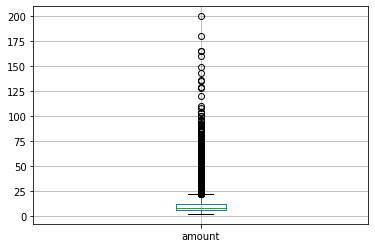

In [ ]:
df.boxplot(column=["amount"])

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-0.5*IQR
    upper_range=Q3+0.5*IQR
    return lower_range,upper_range

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df["amount"])
df["amount"]=np.where(df["amount"]>high_leadtime,high_leadtime,df["amount"])

In [ ]:
df["amount"]=np.where(df["amount"]<low_leadtime,low_leadtime,df["amount"])

<Axes: >

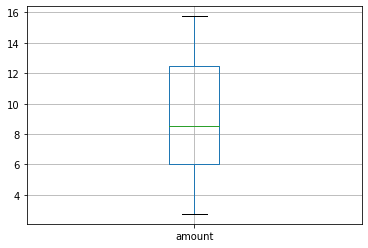

In [ ]:
df.boxplot(column=["amount"])

In [ ]:
len(list(df["amount"]))

49989

EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

(0.0, 100.0)

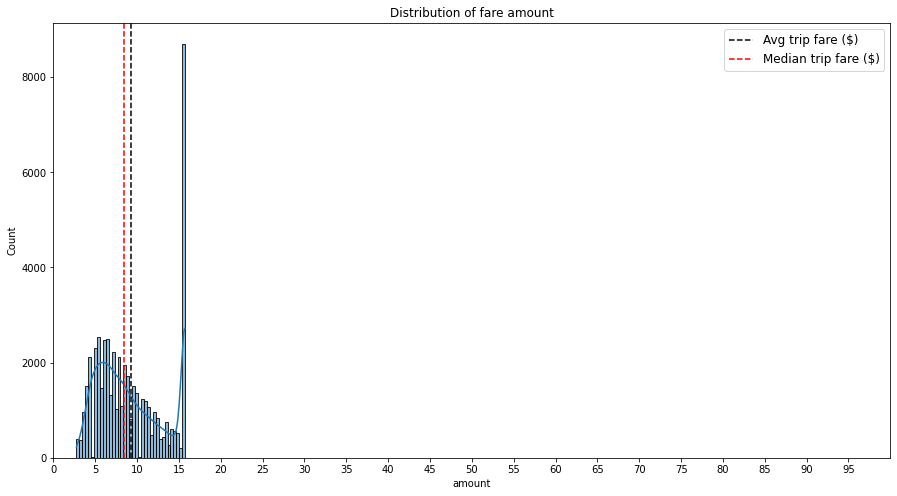

In [ ]:
sns.histplot(data=df,x="amount",kde=True)

plt.axvline(df["amount"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip fare ($)")
plt.axvline(df["amount"].median(),color = "r",
            linestyle = "dashed",label = "Median trip fare ($)")

plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 100, step=5))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,100)

In [ ]:
df = df.drop(df[df['latitude_of_dropoff']<-90].index, axis = 0)
df = df.drop(df[df['latitude_of_dropoff']>90].index, axis = 0)

df = df.drop(df[df['longitude_of_dropoff']<-180].index, axis = 0)
df = df.drop(df[df['longitude_of_dropoff']>180].index, axis = 0)

In [ ]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

Text(0, 0.5, 'Frequency')

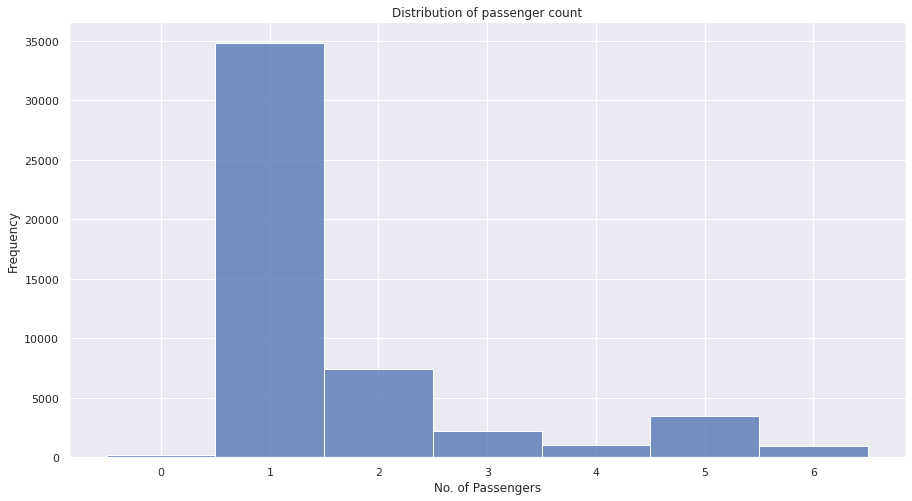

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=df, x="no_of_passenger", stat="count", discrete=True)
plt.title("Distribution of passenger count")
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

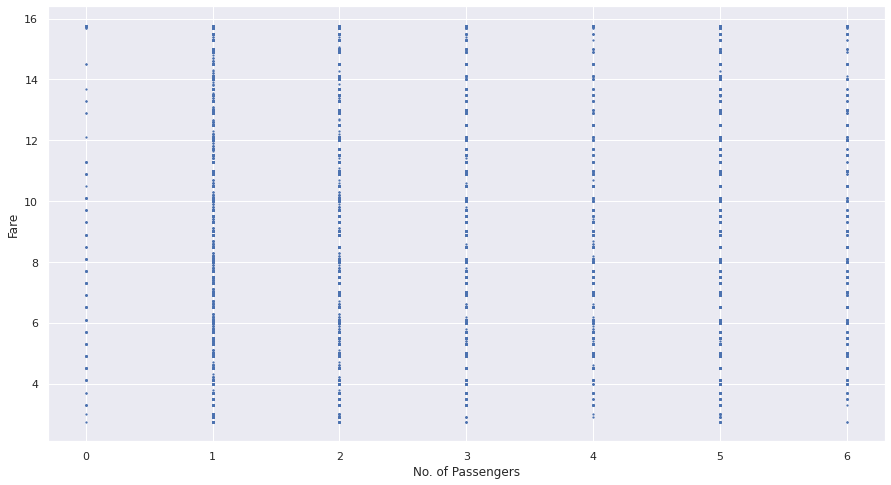

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['no_of_passenger'], y=df['amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

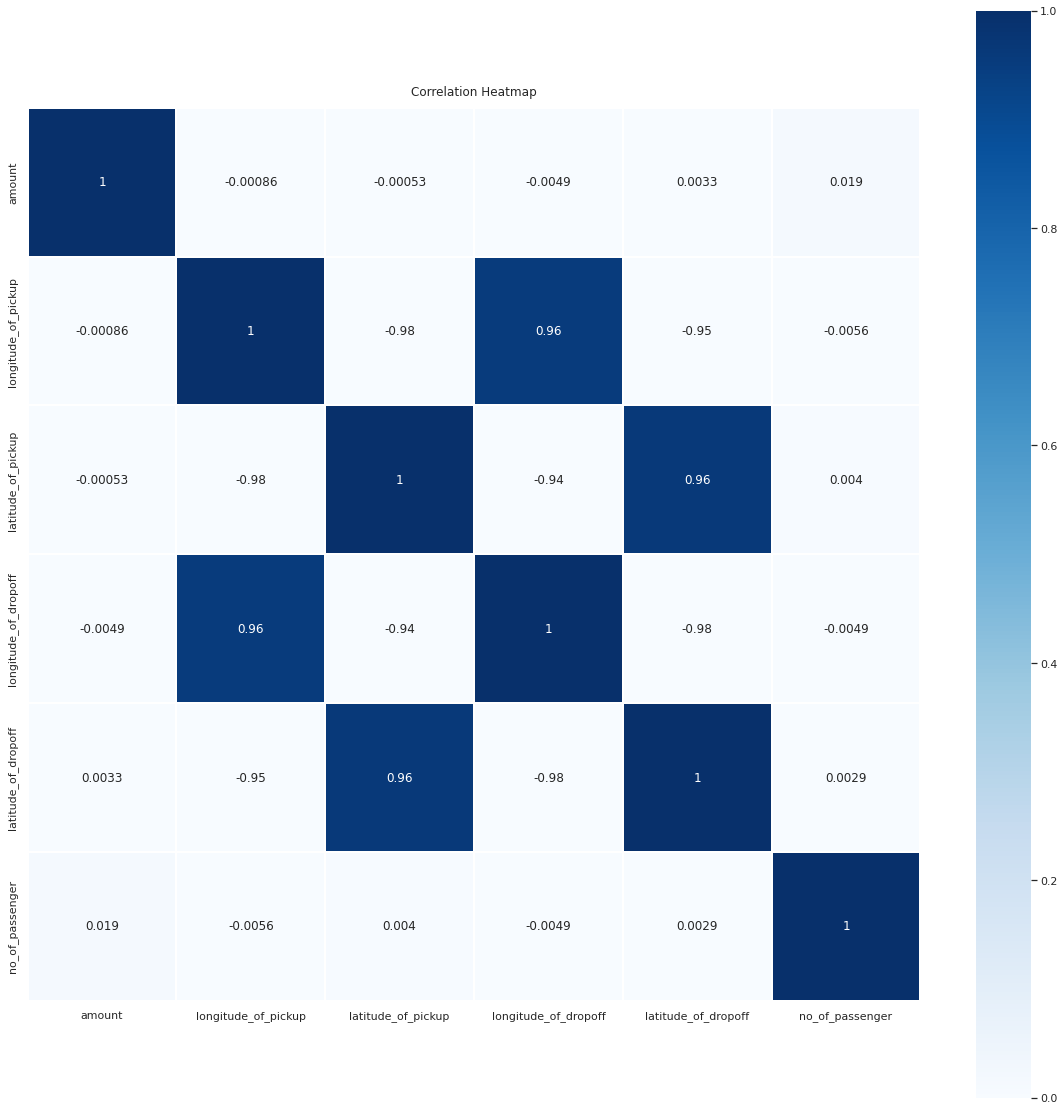

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0,vmin=0, 
            square=True, cmap="Blues", linecolor='white', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df[df.no_of_passenger <7][['amount','no_of_passenger']].corr()

,amount,no_of_passenger
amount,1.000000,0.019477
no_of_passenger,0.019477,1.000000


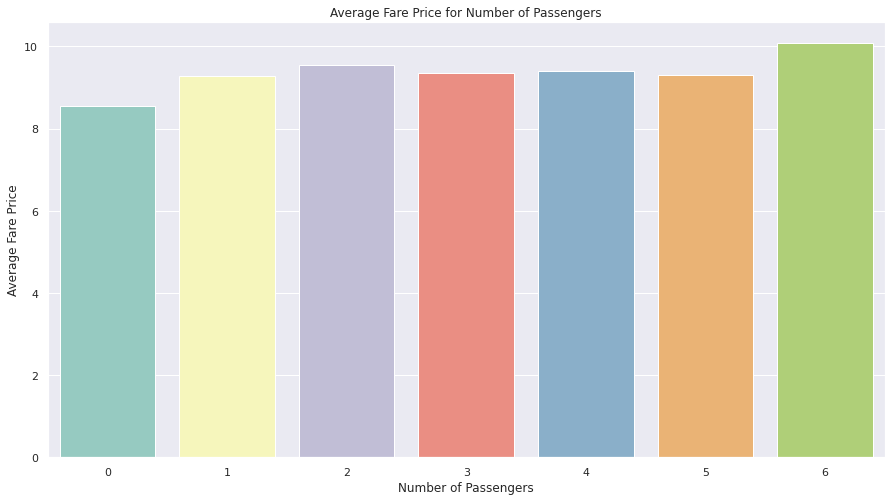

In [ ]:
passenger_fare = df.groupby(['no_of_passenger']).mean()
sns.barplot(x=passenger_fare.index, y=passenger_fare['amount'], palette = "Set3")
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop("amount",axis=1)
y=df["amount"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

Model 1 : Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_1=LinearRegression()

In [ ]:
model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
model_1.score(X_train,y_train)

0.0005729344146180315

In [ ]:
model_1.score(X_test,y_test)

0.0005224659073943538

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49989 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                49989 non-null  float64
 1   longitude_of_pickup   49989 non-null  float64
 2   latitude_of_pickup    49989 non-null  float64
 3   longitude_of_dropoff  49989 non-null  float64
 4   latitude_of_dropoff   49989 non-null  float64
 5   no_of_passenger       49989 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.7 MB


Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=100,interaction_only=True)
# X_train2=poly.fit_transform(X_train)
# X_test2=poly.fit_transform(X_test)
poly_clf=linear_model.LinearRegression()
poly_clf.fit(X_train,y_train)
print(poly_clf.score(X_train,y_train))
print(poly_clf.score(X_test,y_test))

0.0005729344146180315
0.0005224659073943538


Model 3: DECISION TREE REGRESSOR MODEL

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
model2=DecisionTreeRegressor(max_depth=3)

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
DecisionTreeRegressor(max_depth=3)

DecisionTreeRegressor(max_depth=3)

In [ ]:
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.23464488660565186
0.23874227692557415


Model 4: KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from scipy.stats import zscore

In [ ]:
model_4=KNeighborsRegressor()
model_4.fit(X_train,y_train)
predicted_labels=model_4.predict(X_test)
print(model_4.score(X_test,y_test))
print(model_4.score(X_train,y_train))

0.7159979697541017
0.7960789839977247


Model 6: Support vector machine

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_5=SVR(kernel='rbf')
model_5.fit(X_train,y_train)
print(model_5.score(X_train,y_train))
print(model_5.score(X_test,y_test))

-0.050363454233554705
-0.05525084688972437


Model 7: descion tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_7=DecisionTreeRegressor(max_depth=3)

In [ ]:
model_7.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
print(model_7.score(X_train,y_train))
print(model_7.score(X_test,y_test))

0.23464488660565175
0.23874227692557415


Model 8:Bagging model

In [ ]:
from sklearn.ensemble import BaggingRegressor
model_bag=BaggingRegressor(base_estimator=model_7)
model_bag.fit(X_train,y_train)
print(model_bag.score(X_train,y_train))
print(model_bag.score(X_test,y_test))

0.24708333375897285
0.2521267278057926


Model 9:Boosting model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_bag=AdaBoostRegressor(n_estimators=1)
model_bag.fit(X_train,y_train)
print(model_bag.score(X_train,y_train))
print(model_bag.score(X_test,y_test))

0.23234725763998865
0.2365199217781857
